In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
sns.set_style("darkgrid")
import sklearn

Reading in Data and selected columns

In [3]:
# choose between the normalized or standardized version of the data
air_data_all = pd.read_csv('data_4comp_std_labeled.csv', delimiter=',')

# select only the columns that pca will be used on
cols = ["PM2.5","PM10","NO2","O3"]   
air_data= air_data_all[cols]

#data converted to np array for easier indexing
air_data_np = np.array(air_data)

# colums with the ratings: categories 1,2,3,4
ratings = air_data_all['cat'] 
cat_labels = ["very low air quality", "low air quality", "medium air quality",  "good air quality"]

In [4]:
def pca(x):
    # Compute the autocovariance matrix and store it into autocovar
    autocovar = x.T @ x

    # Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec
    eigenval, eigenvec = np.linalg.eig(autocovar)
    return (eigenval, eigenvec)


Plot the spectrum of the eigenvalues. How many principal components to include based on the spectrum plot?

<BarContainer object of 4 artists>

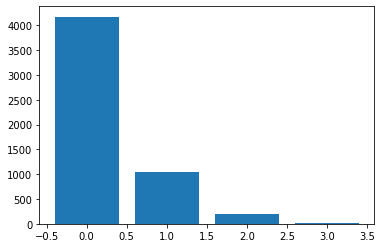

In [6]:
%matplotlib inline

(eigenval, eigenvec) = pca(air_data)

# Sort eigenvectors (and -values) by descending order of eigenvalues.
sort = np.argsort(-eigenval)
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

# To get an idea of the eigenvalues we plot them.
figure = plt.figure('Eigenvalue comparison')
plt.bar(np.arange(len(eigenval)), eigenval)

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot? (**put your answer in the cell below of this code cell**)

In [8]:
### nascimento
## Covariance matrix of the normalized dataset
covmatrix = np.cov(air_data.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
e, v = np.linalg.eig(covmatrix)

# order descendingly by largest eigenvalue
order = np.argsort((np.argsort(e) * -1))
e = e[order]
v = v[:,order]

print('Eigenvectors \n%s' %e)
print('\nEigenvalues \n%s' %v)

# generate PCA component space (PCA scores)
pc = np.dot(air_data, v)

Eigenvectors 
[0.77506288 3.06914114 0.01285307 0.14294291]

Eigenvalues 
[[-0.37875802 -0.53439699 -0.72981351 -0.19579188]
 [-0.41123258 -0.52622558  0.67995461 -0.3027146 ]
 [ 0.19482816 -0.53376742  0.06976788  0.81991876]
 [-0.80589833  0.39063901  0.01289986  0.44470512]]


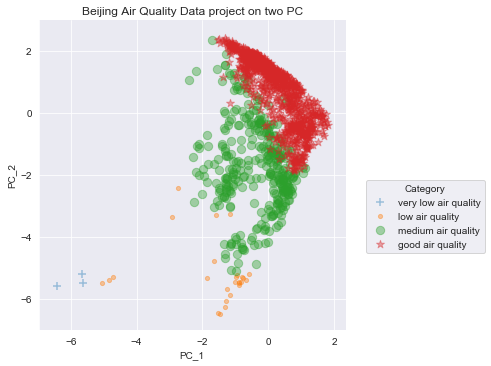

In [13]:
# set data to a Pandas Dataframa to ease plotting
names = ["PC_"+str(x+1) for x in range(pc.shape[1])]
names.append('cat')
data_pca = pd.DataFrame(data= np.c_[pc, ratings], 
                     columns=names)
data_pca['cat'] = data_pca['cat'].astype(int)


ax = sns.lmplot('PC_1', 
                'PC_2', 
                data=data_pca, 
                hue='cat', 
                markers=['+','.','o','*'],
                fit_reg=False,
                scatter_kws={'alpha':0.4, "s": 70}, 
                legend_out=False)
plt.title('Beijing Air Quality Data project on two PC')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Category', labels = cat_labels);

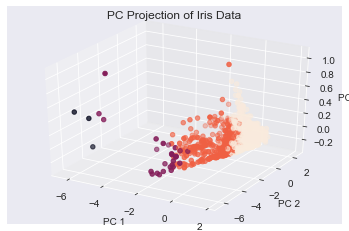

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_pca['PC_1'], 
           data_pca['PC_2'],
           data_pca['PC_3'],
           c=data_pca['cat']);

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PC Projection of Iris Data');

In [15]:
r = air_data.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 10
# ["PM2.5","PM10","NO2","O3"]

f1=0   #pm2.5
f2=3   #o3

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'x-label', 
           ylabel= 'y-label',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=np.array(air_data)[:,f1],
                y=np.array(air_data)[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='PM2.5', 
           ylabel= 'O3',
           title=' Dataset');

NameError: name 's' is not defined